https://www.kaggle.com/anokas/quora-question-pairs/data-analysis-xgboost-starter-0-35460-lb
この記事を参考にする

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette() #the list of rgb tuples

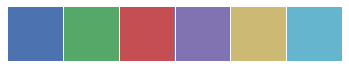

In [2]:
sns.palplot(pal)

In [3]:
print('# File size')
for f in os.listdir('../Quora_Question_pairs_data'):#ディレクトリ内のファイルのリスト(str)
    if 'zip' not in f:
        #str.ljust(n):leftサイドに空白、文字列がn文字になるように調整する
        #os.path.getsize(path名):当該ファイルのバイト数を返す
        print(f.ljust(30) + str(round(os.path.getsize('../Quora_Question_pairs_data/' + f) / 1000000,2)) + 'MB')

# File size
train.csv                     63.4MB
test.csv                      314.02MB


In [4]:
df_train = pd.read_csv('../Quora_Question_pairs_data/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train.is_duplicate.mean()*100,2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(qids.unique())))
print('Number of questions that appea multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appea multiple times: 111780


<function print>

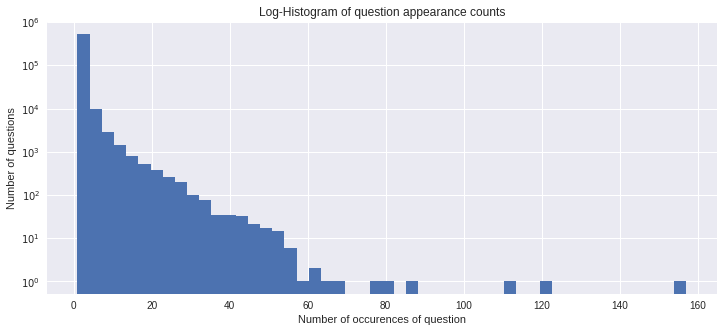

In [6]:
plt.figure(figsize=(12,5))
plt.hist(qids.value_counts(),bins=50)
plt.yscale('log', nonposy='clip') #nonposyで小さい値に下駄を履かせる
plt.title('Log-Histogram of question appearance counts')
plt.ylabel('Number of questions')
plt.xlabel('Number of occurences of question')
print

# Test submission

In [7]:
from sklearn.metrics import log_loss #log-loss
p = df_train['is_duplicate'].mean() #予測確率（平均値）
#全ての予測値が、平均値の時の損失関数の値
print('Predicted score: {}'.format(log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p)))

Predicted score: 0.6585273839844354


In [8]:
df_test = pd.read_csv('../Quora_Question_pairs_data/test.csv')
sub = pd.DataFrame({'test_id' : df_test['test_id'],'is_duplicate':p})
sub.to_csv('naive_submission.csv',index=False)
sub.head()

,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


# Test set

In [9]:
df_test = pd.read_csv('../Quora_Question_pairs_data/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [10]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


# Text analysis

In [11]:
#Questionのペアを統合する
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


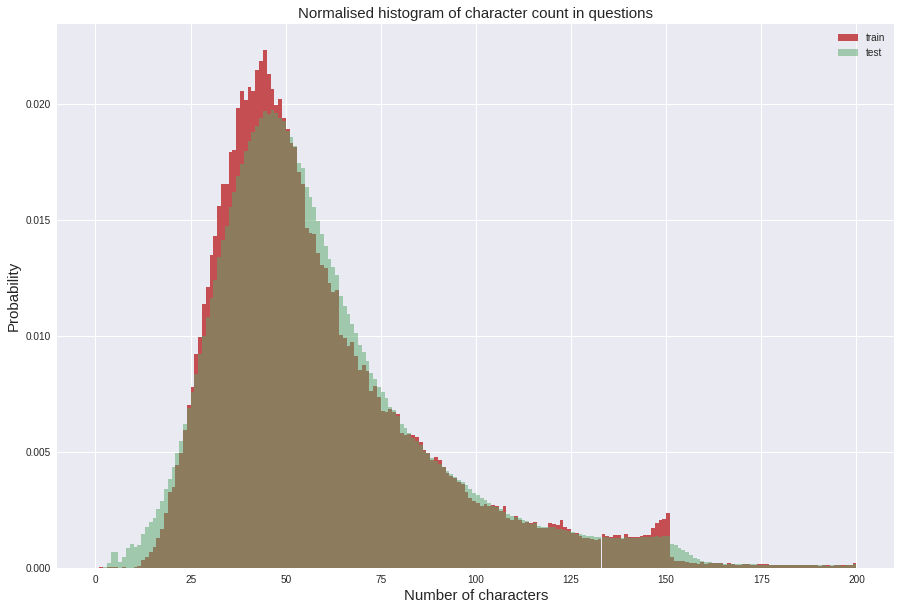

In [12]:
#文字数でヒストグラム作成
dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15,10))
plt.hist(dist_train,bins=200,range=[0,200],color=pal[2],normed=True,label='train') #rangeで範囲を指定できる
plt.hist(dist_test,bins=200,range=[0,200],color=pal[1],normed=True,alpha=0.5,label='test')
plt.title('Normalised histogram of character count in questions',fontsize=15)
plt.legend()
plt.xlabel('Number of characters',fontsize=15)
plt.ylabel('Probability',fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'
      .format(dist_train.mean(),dist_train.std(),dist_test.mean(),dist_test.std(),dist_train.max(),dist_test.max()))

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


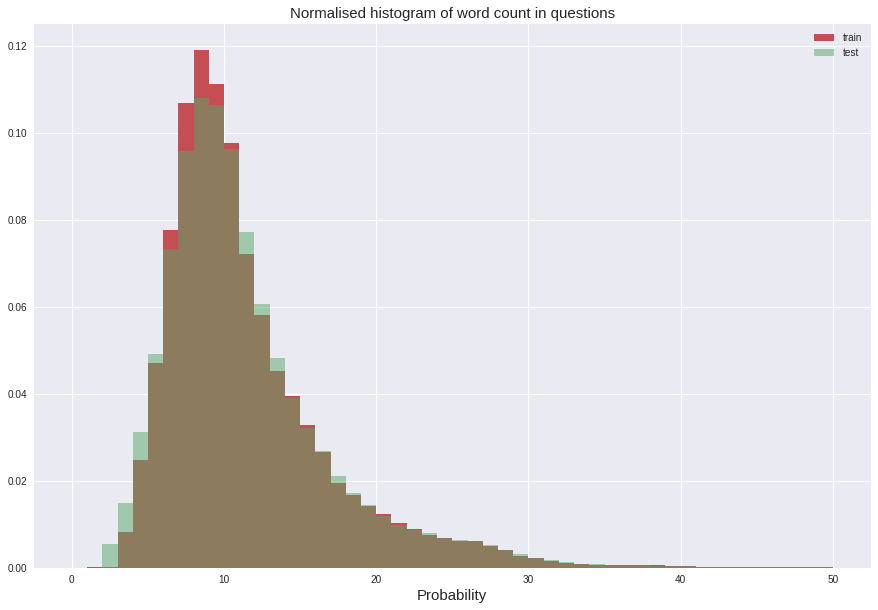

In [13]:
#単語数のヒストグラム
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(dist_train,bins=50,range=[0,50],color=pal[2],normed=True,label='train')
plt.hist(dist_test,bins=50,range=[0,50],color=pal[1],normed=True,alpha=0.5,label='test')
plt.title('Normalised histogram of word count in questions',fontsize=15)
plt.legend()
plt.xlabel('Number of words',fontsize=15)
plt.xlabel('Probability',fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

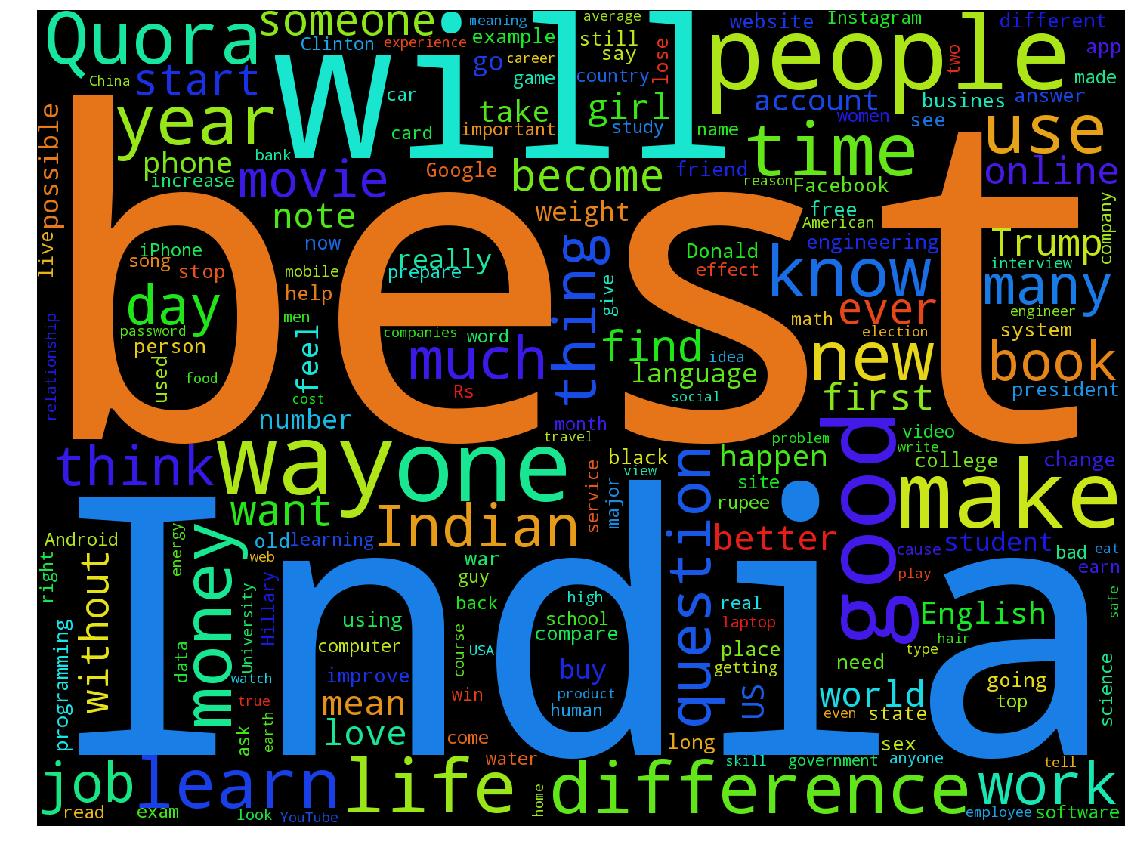

In [14]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440,height=1080).generate(" ".join(train_qs.astype(str))) #リストの要素を空白でつなげる
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

# Semantic Analysis

In [15]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Question with questrion marks: {:.2f}%'.format(qmarks * 100))
print('Question with [math] tags: {:.2f}%'.format(math * 100))
print('Question with full stops: {:.2f}%'.format(fullstop * 100))
print('Question with capitalized first letters:{:.2f}'.format(capital_first * 100))
print('Question with capital lettes: {:.2f}%'.format(capitals * 100))
print('Question with numbers: {:.2f}%'.format(numbers * 100))

Question with questrion marks: 99.87%
Question with [math] tags: 0.12%
Question with full stops: 6.31%
Question with capitalized first letters:99.81
Question with capital lettes: 99.95%
Question with numbers: 11.83%


# Initial Feature Analysis

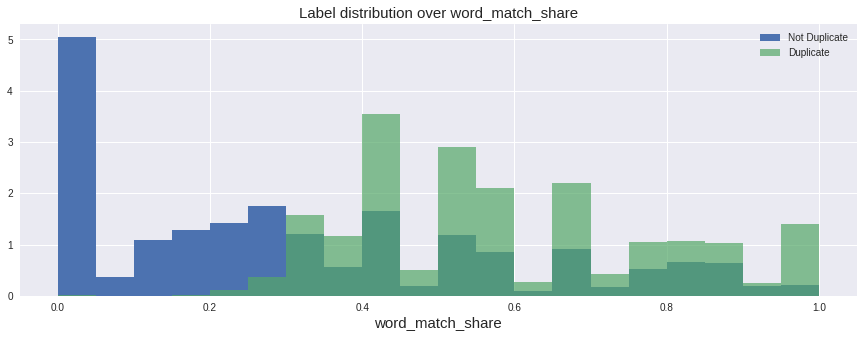

In [16]:
#文章中で一致する単語の数の分布
from nltk.corpus import stopwords

stops = set(stopwords.words("english")) #setで重複する要素は取り除かれる

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2)) / (len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15,5))
train_word_match = df_train.apply(word_match_share,axis=1,raw=True)
plt.hist(train_word_match[df_train['is_duplicate']==0],bins=20,normed=True,label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate']==1],bins=20,normed=True,alpha=0.7,label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share',fontsize=15)
plt.xlabel('word_match_share',fontsize=15)
    

In [17]:
%whos

Variable           Type                    Data/Info
----------------------------------------------------
WordCloud          type                    <class 'wordcloud.wordcloud.WordCloud'>
capital_first      float64                 0.99813252863
capitals           float64                 0.999505305597
cloud              WordCloud               <wordcloud.wordcloud.Word<...>object at 0x7f444d2c88d0>
df_test            DataFrame                        test_id         <...>2345796 rows x 3 columns]
df_train           DataFrame                           id    qid1   <...>[404290 rows x 6 columns]
dist_test          Series                  0          11\n1         <...>91591     9\ndtype: int64
dist_train         Series                  0         14\n1          <...>08579    10\ndtype: int64
f                  str                     test.csv
fullstop           float64                 0.063082193475
gc                 module                  <module 'gc' (built-in)>
log_loss           func

In [18]:
from collections import Counter

def get_weight(count,eps=10000,min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)
    
eps = 5000
words = (' '.join(train_qs)).lower().split() #文章一つにくっつけてから分解する
counts = Counter(words) #単語の頻度数の辞書型
weights = {word: get_weight(count) for word, count in counts.items()} #言葉ごとに重み付、頻出後は重みが小さい

In [19]:
print('Most common words and wights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print(sorted(weights.items(),key=lambda x:x[1], reverse=True)[:10])#数値をkeyにしてソートしている。

Most common words and wights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 
[('hookups', 9.998000399920016e-05), ('ensuring', 9.998000399920016e-05), ('conflate', 9.998000399920016e-05), ('lab/terrier', 9.998000399920016e-05), ('borrower', 9.998000399920016e-05), ('dandiya', 9.998000399920016e-05), ('universalis', 9.998000399920016e-05), ('product-based?', 9.998000399920016e-05), ('(comets,', 9.998000399920016e-05), ('(has', 9.998000399920016e-05)]


In [32]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split(): #q1のベクトル作成
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split(): #q2のベクトル作成
        if word not in stops:
            q2words[word] = 1
    if len(q1words)==0 or len(q2words)==0: #全てのtermがstop wordなら0を返す
        return 0
    
    shared_weights = [weights.get(w,0) for w in q1words.keys() if w in q2words] + [weights.get(w,0) for w in q2words.keys() if w in q1words] #共通する言葉を抽出し、重み値に変換
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w,0) for w in q2words] #共通しない言葉も含めて重み値に変換
    R = np.sum(shared_weights) / np.sum(total_weights) #重複する言葉が少ないと小さい、重複がcommon wordばかりだと大きくなりにくい
    return R

/home/kyohei/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


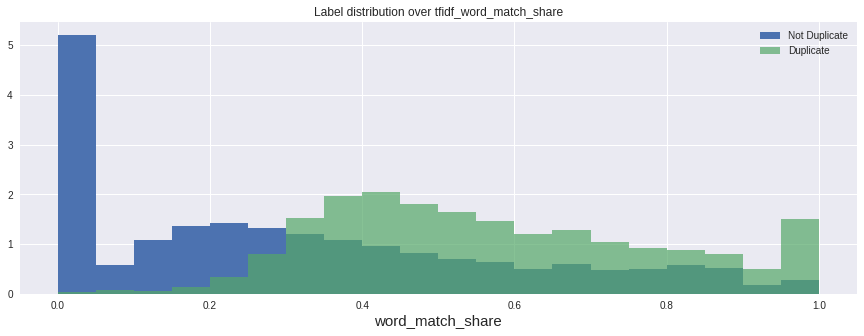

In [34]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share,axis=1,raw=True)#rawがTrueだとndarrayを受け取る、Falseだとrecieve
plt.hist(tfidf_train_word_match[df_train['is_duplicate']==0].fillna(0),bins=20,normed=True,label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate']==1].fillna(0),bins=20,normed=True,alpha=.7,label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share')
plt.xlabel('word_match_share', fontsize=15)

In [37]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'],train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'],tfidf_train_word_match.fillna(0)))

Original AUC: 0.780553200628
   TFIDF AUC: 0.770566927411


# Rebalancing the data

In [38]:
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1,raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

/home/kyohei/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars
/home/kyohei/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in long_scalars


In [44]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

#over sample
#重複質問数をtestとtrainで合わせる。testの非重複質問数を人工的に増やす。
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -= 1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]]) #scaleの少数点以下の値分の調整
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train,neg_train]) #新しいtrainデータ
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist() #新しいtrainデータ
del pos_train, neg_train #オブジェクトの削除

121169
510054
0.19124366100096607


In [49]:
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=4242)

/home/kyohei/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# XGBoost

In [55]:
import xgboost as xgb

#set our parameter for xgboost

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.683189	valid-logloss:0.683238
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.602041	valid-logloss:0.602515
[20]	train-logloss:0.544863	valid-logloss:0.545663
[30]	train-logloss:0.503151	valid-logloss:0.504194
[40]	train-logloss:0.471989	valid-logloss:0.473231
[50]	train-logloss:0.448341	valid-logloss:0.449746
[60]	train-logloss:0.430164	valid-logloss:0.431706
[70]	train-logloss:0.416072	valid-logloss:0.417726
[80]	train-logloss:0.405012	valid-logloss:0.406775
[90]	train-logloss:0.396327	valid-logloss:0.398177
[100]	train-logloss:0.389488	valid-logloss:0.391404
[110]	train-logloss:0.384071	valid-logloss:0.386038
[120]	train-logloss:0.379786	valid-logloss:0.381792
[130]	train-logloss:0.376375	valid-logloss:0.378414
[140]	train-logloss:0.373661	valid-logloss:0.375724
[150]	train-logloss:0.371482	valid-logloss:0.373567
[160]	train-logloss:0.369728

In [56]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)

In [57]:
sub.head()

,test_id,is_duplicate
0,0,0.031617
1,1,0.360195
2,2,0.364868
3,3,0.000796
4,4,0.197357
